In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import src.tomo_fusion.hyperparameter_tuning as hyper
import src.tomo_fusion.functionals_definition as fct_def

In [3]:
# Load phantom data
psis = np.load('../../../dataset_generation/sxr_samples/psis.npy')
sxr_samples  = np.load('../../../dataset_generation/sxr_samples/sxr_samples_with_background.npy')
alphas  = np.load('../../../dataset_generation/sxr_samples/alpha_random_values.npy')
trim_vals = np.load('../../../dataset_generation/sxr_samples/trimming_values.npy')
random_peak_vals  = np.load('../../../dataset_generation/sxr_samples/peak_values_gaussian_background.npy')


In [4]:
reg_param_data, best_reg_param, nb_occurrences, factors_avg_wrt_best, factors_median_wrt_best, reg_param_median = [],[],[],[],[],[]

anis_param_data, factors_cv_wrt_best_random, factors_cv_wrt_best_random_full, mse_cv_random_full, mse_avg_alpha, factors_cv_wrt_best_camera, factors_cv_wrt_best_camera_full = [],[],[],[],[],[], []

In [5]:
sigmas = ["sigma005", "sigma01", "sigma005005"]

for sigma in sigmas:

    reg_param_data.append(np.load('tuning_data/reg_param_tuning_'+sigma+'/tuning_data.npy', allow_pickle=True))
    best_reg_param.append(np.load('tuning_data/reg_param_tuning_'+sigma+'/best_hyperparams.npy'))
    nb_occurrences.append(np.load('tuning_data/reg_param_tuning_'+sigma+'/nb_occurrences.npy'))
    factors_avg_wrt_best.append(np.load('tuning_data/reg_param_tuning_'+sigma+'/factors_avg_wrt_best.npy'))
    factors_median_wrt_best.append(np.load('tuning_data/reg_param_tuning_'+sigma+'/factors_median_wrt_best.npy'))
    reg_param_median.append(np.load('tuning_data/reg_param_tuning_'+sigma+'/reg_param_median.npy'))
    
    anis_param_data.append(np.load('tuning_data/anis_param_tuning_'+sigma+'/tuning_data.npy', allow_pickle=True))
    factors_cv_wrt_best_random.append(np.load('tuning_data/anis_param_tuning_'+sigma+'/factors_cv_wrt_best_random.npy'))
    factors_cv_wrt_best_random_full.append(np.load('tuning_data/anis_param_tuning_'+sigma+'/factors_cv_wrt_best_random_full.npy'))
    mse_cv_random_full.append(np.load('tuning_data/anis_param_tuning_'+sigma+'/mse_cv_random_full.npy'))
    mse_avg_alpha.append(np.load('tuning_data/anis_param_tuning_'+sigma+'/mse_average_alpha.npy'))
    factors_cv_wrt_best_camera.append(np.load('tuning_data/anis_param_tuning_'+sigma+'/factors_cv_wrt_best_camera.npy'))
    factors_cv_wrt_best_camera_full.append(np.load('tuning_data/anis_param_tuning_'+sigma+'/factors_cv_wrt_best_camera_full.npy'))

In [24]:
for j in range(3):
    print(sigmas[j])

    mses_best_true_alpha = np.zeros(100)
    for i in range(100):
        mses_best_true_alpha[i] = np.min(reg_param_data[j][i]["GT"][2, :])
    rel_err = 100*(mse_cv_random_full[j]-mses_best_true_alpha)/mses_best_true_alpha
    ratio_pipeline_to_best_true_alpha = mse_cv_random_full[j] / mses_best_true_alpha
    #print(np.where(rel_err>150))
    print("MSE average best true alpha ", np.mean(mses_best_true_alpha), "+-", np.std(mses_best_true_alpha))
    print("MSE average CV random full ", np.mean(mse_cv_random_full), "+-", np.std(mse_cv_random_full))
    print("MSE average fixed alpha ", np.mean(mse_avg_alpha[j]), "+-", np.std(mse_avg_alpha[j]))
        
    factors_01_vs_best_true_alpha = np.zeros(100)
    for i in range(100):
        factors_01_vs_best_true_alpha[i] = reg_param_data[j][i]["GT"][2,12] / reg_param_data[j][i]["GT"][2,np.argmin(reg_param_data[j][i]["GT"][2,:])]
        
    mses_fixed_alpha = np.zeros(100)
    for i in range(100):
        mses_fixed_alpha[i] = anis_param_data[j][i]["GT"][2,6] 
    rel_err_fixed_alpha = 100*(mses_fixed_alpha-mses_best_true_alpha)/mses_best_true_alpha
        
    print("Correlation between true anisotropic parameter and performance degradation when using reg_param=0.1\n", pearsonr(factors_01_vs_best_true_alpha, alphas[900:]), "\n")
    
    #plt.plot(rel_err, '.')
    #pearsonr(ratio_pipeline_to_best, alphas_fine_new_bounds[900:])
    #pearsonr(rel_err, alphas_fine_new_bounds[900:])
    #print(np.mean(ratio_pipeline_to_best_true_alpha), np.std(ratio_pipeline_to_best_true_alpha))
    #print(np.median(ratio_pipeline_to_best_true_alpha))
    
    thr=350
    
    # print("Average relative error on best MSE ",np.mean(rel_err), "+-", np.std(rel_err))
    # print("Median relative error on best MSE", np.median(rel_err))
    # print("90% quantile  relative error on best MSE", np.quantile(rel_err, 0.9))
    print("Average relative error on best MSE ",np.mean(rel_err[rel_err<thr]), "+-", np.std(rel_err[rel_err<thr]))
    print("Median relative error on best MSE", np.median(rel_err[rel_err<thr]))
    print("90% quantile  relative error on best MSE", np.quantile(rel_err[rel_err<thr], 0.9))
    
    print("Fixed alpha")
    # print("Average relative error on best MSE ",np.mean(rel_err_fixed_alpha), "+-", np.std(rel_err_fixed_alpha))
    # print("Median relative error on best MSE", np.median(rel_err_fixed_alpha))
    # print("90% quantile  relative error on best MSE", np.quantile(rel_err_fixed_alpha, 0.9))
    print("Average relative error on best MSE ",np.mean(rel_err_fixed_alpha[rel_err_fixed_alpha<thr]), "+-", np.std(rel_err_fixed_alpha[rel_err_fixed_alpha<thr]))
    print("Median relative error on best MSE", np.median(rel_err_fixed_alpha[rel_err_fixed_alpha<thr]))
    print("90% quantile  relative error on best MSE", np.quantile(rel_err_fixed_alpha[rel_err_fixed_alpha<thr], 0.9))
    
    print("\n\n")

sigma005
MSE average best true alpha  0.00040368651818404314 +- 0.00034031982463500466
MSE average CV random full  0.0006218705237403433 +- 0.0004478047552229804
MSE average fixed alpha  0.0004513470017287364 +- 0.0003290067922505657
Correlation between true anisotropic parameter and performance degradation when using reg_param=0.1
 PearsonRResult(statistic=np.float64(0.07764513408298593), pvalue=np.float64(0.4425765207345404)) 

Average relative error on best MSE  16.599630140029294 +- 41.471394409371854
Median relative error on best MSE 8.197192531050327
90% quantile  relative error on best MSE 43.30245561335671
Fixed alpha
Average relative error on best MSE  22.326613511074466 +- 30.23922273121327
Median relative error on best MSE 16.893403506601025
90% quantile  relative error on best MSE 54.946683336650985



sigma01
MSE average best true alpha  0.0006549323508850393 +- 0.0004478196785653822
MSE average CV random full  0.0006218705237403433 +- 0.0004478047552229804
MSE average fix

In [7]:
# plt.plot(anis_param_data[2][1]["GT"][2,:])
# plt.show()
# plt.plot(anis_param_data[2][1]["CV_full_random"][1,:])

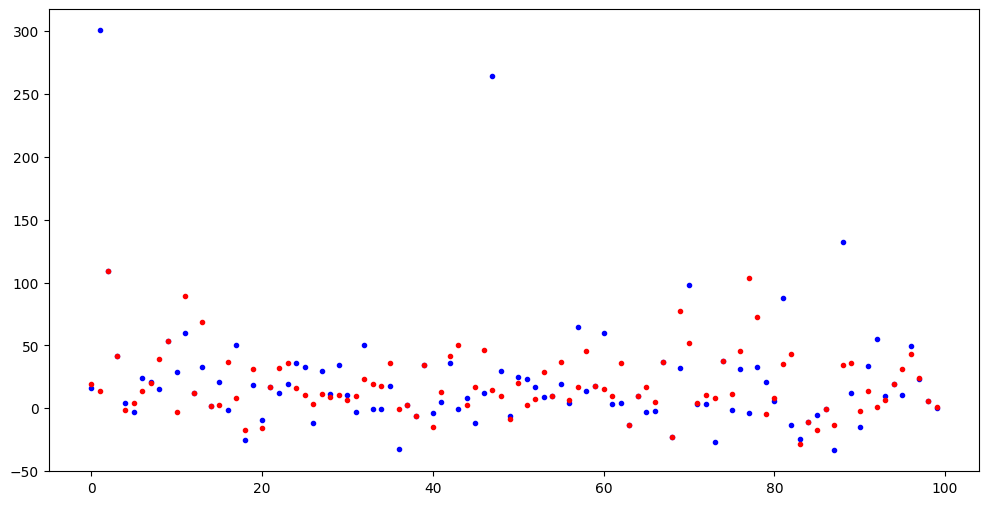

In [22]:
plt.figure(figsize=(12,6))
plt.plot(rel_err, 'b.')
plt.plot(rel_err_fixed_alpha, 'r.')

(array([0.00291624, 0.00583247, 0.00583247, 0.00729059, 0.02041365,
        0.02770424, 0.02187177, 0.00729059, 0.00583247, 0.01749742,
        0.01020683, 0.00437435, 0.        , 0.        , 0.00291624,
        0.00145812, 0.        , 0.00145812, 0.        , 0.00291624]),
 array([-28.35082043, -21.49266508, -14.63450974,  -7.7763544 ,
         -0.91819906,   5.93995629,  12.79811163,  19.65626697,
         26.51442232,  33.37257766,  40.230733  ,  47.08888834,
         53.94704369,  60.80519903,  67.66335437,  74.52150971,
         81.37966506,  88.2378204 ,  95.09597574, 101.95413109,
        108.81228643]),
 <BarContainer object of 20 artists>)

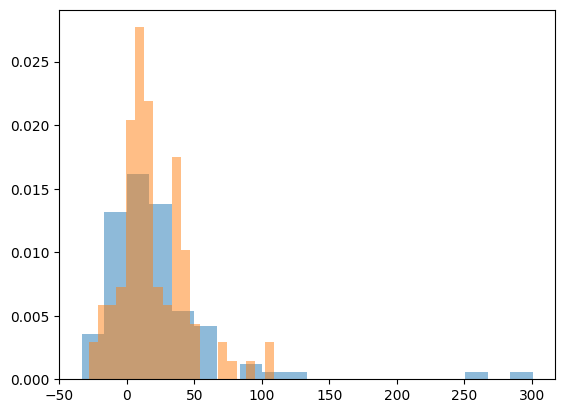

In [17]:
plt.hist(rel_err, alpha=0.5, bins=20, density=True)
plt.hist(rel_err_fixed_alpha, alpha=0.5, bins=20, density=True)

In [116]:
rel_err

array([ 1.60631213e+01,  3.00583414e+02,  1.08812286e+02,  4.14468689e+01,
        3.79734291e+00, -3.35618751e+00,  2.43816192e+01,  2.06386861e+01,
        1.49952379e+01,  5.31241153e+01,  2.88833343e+01,  5.98722751e+01,
        1.24305904e+01,  3.30220580e+01,  1.45580905e+00,  2.09004404e+01,
       -1.52121503e+00,  5.01008667e+01, -2.51447502e+01,  1.85062938e+01,
       -8.99654870e+00,  1.69336261e+01,  1.23430505e+01,  1.92651286e+01,
        3.62934690e+01,  3.29108089e+01, -1.16667284e+01,  2.95219676e+01,
        1.12380790e+01,  3.46340806e+01,  1.06186759e+01, -3.36529476e+00,
        5.05813162e+01, -7.98280038e-01, -2.54740095e-01,  1.76548744e+01,
       -3.20872074e+01,  2.64628635e+00, -6.21686386e+00,  3.47209881e+01,
       -3.70379807e+00,  4.62582517e+00,  3.57355320e+01, -9.76958388e-01,
        7.78077044e+00, -1.20306628e+01,  1.23591206e+01,  2.64473798e+02,
        3.00004136e+01, -6.04354000e+00,  2.50570428e+01,  2.30123163e+01,
        1.70925669e+01,  

<Figure size 640x480 with 0 Axes>

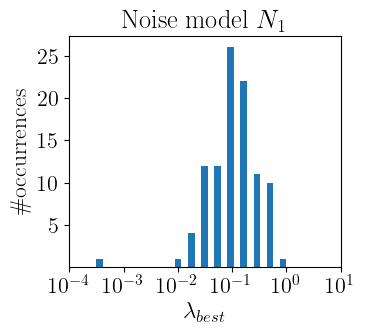

In [13]:
plt.figure()
vec = np.zeros(100)
counter=0
for i in range(reg_param_data[0]["GT"].shape[1]):
    nb_occurrences_i = np.where(best_reg_param == reg_param_data[0]["GT"][0,i])[0].size
    vec[counter:counter+nb_occurrences_i] = i
    counter += nb_occurrences_i
plt.figure(figsize=(3.5,3))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})
plt.hist(vec, bins=29)
plt.xticks([0,4,8,12,16,20], [r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$10^{0}$", r"$10^{1}$"], fontsize=16)
plt.yticks([5,10,15,20,25], fontsize=16)#, [r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$10^{0}$", r"$10^{1}$"], fontsize=16)
plt.title(r"$\mathrm{Noise \;model \;}N_1$", fontsize=19)
plt.xlabel(r"$\lambda_{best}$", fontsize=17)
plt.ylabel(r"$\# \mathrm{occurrences}$", fontsize=17, labelpad=5)

#plt.savefig('../../../figures/reg_param_tuning.eps', format='eps', bbox_inches="tight")

plt.show()

In [49]:
# idd=971
# ground_truth = sxr_samples_fine_new_bounds[idd, :, :].squeeze()
# import skimage.transform as skimt
# gts = skimt.resize(ground_truth, (120,40), anti_aliasing=False, mode='edge')
# psi = psis_fine_new_bounds[idd, :, :]
# trim_val = trim_val_fine_new_bounds[idd, :]
# import src.tomo_fusion.functionals_definition as fct_def
# f,g = fct_def.define_loglikelihood_and_logprior(ground_truth, psi, sigma_err=7e-3,
#                                                 reg_fct_type="anisotropic",
#                                                     #alpha=uq_data_idx_005005["alpha"],
#                                                     alpha=alphas_fine_new_bounds[idd],
#                                                     seed=idd)
# import src.tomo_fusion.tools.helpers as tomo_helps
# mask_core = tomo_helps.define_core_mask(psi=psi, dim_shape=(120,40), trim_values_x=trim_val)
# import src.tomo_fusion.bayesian_computations as bcomp
# 
# maps = []
# import copy
# for i in range(reg_param_data[0]["GT"].shape[1]):
#     map=bcomp.compute_MAP(f, g, reg_param_data[0]["GT"][0,i], with_pos_constraint=True, clipping_mask=mask_core)
#     maps.append(copy.deepcopy(map))
#     

In [ ]:
ratio_pipeline_to_best = mse_cv_random_full / mses_best
rel_err = 100*(mse_cv_random_full-mses_best)/mses_best
#np.quantile(rel_err,0.9)
#plt.plot(rel_err, '.')
#pearsonr(ratio_pipeline_to_best, alphas_fine_new_bounds[900:])
#pearsonr(rel_err, alphas_fine_new_bounds[900:])
print(np.mean(ratio_pipeline_to_best), np.std(ratio_pipeline_to_best))
print(np.median(ratio_pipeline_to_best))
print(np.mean(rel_err), np.std(rel_err))
print(np.median(rel_err))

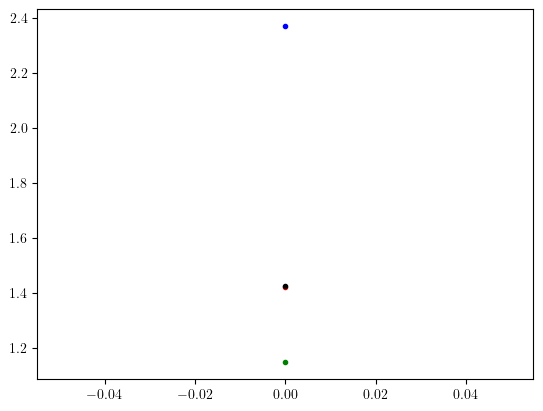

In [61]:
plt.plot(np.mean(factors_cv_wrt_best_random),'b.')
plt.plot(np.mean(factors_cv_wrt_best_random_full),'g.')
plt.plot(np.mean(factors_cv_wrt_best_camera),'r.')
plt.plot(np.mean(factors_cv_wrt_best_camera_full),'k.')

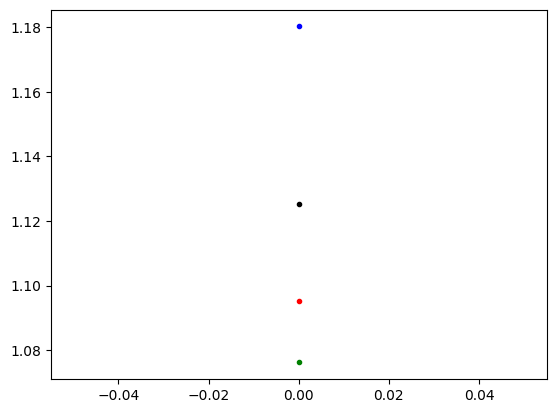

In [19]:
plt.plot(np.median(factors_cv_wrt_best_random),'b.')
plt.plot(np.median(factors_cv_wrt_best_random_full),'g.')
plt.plot(np.median(factors_cv_wrt_best_camera),'r.')
plt.plot(np.median(factors_cv_wrt_best_camera_full),'k.')